# Exercícios - Estatística I

### Questão 1

Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`:
    
Calcule a frequência absoluta para os sobreviventes no _Titanic_.

__Dica.:__ Utilize a função `.value_counts()`

Carregando as principais bibliotecas que iremos utilizar:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sns.load_dataset('titanic')

In [2]:
df = pd.read_csv('Titanic.csv')

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
df['Survived'].count()

891

### Questão 2

Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`:
    
Calcule a frequência relativa, relativa percentual e acumulativa para os sobreviventes no _Titanic_.

__Dica.:__ Utilize a função `.value_counts()`

In [6]:
freq_table = pd.concat([df.Survived.value_counts(),
                        round(df.Survived.value_counts(normalize = True),3),
                        round(df.Survived.value_counts(normalize = True),3)* 100,
                        (round(df.Survived.value_counts(normalize = True),3)* 100).cumsum()],
                       axis = 1,
                       keys = ("freq", "freq_relativa", 'freq_percentual', 'freq_acumulada' ), names=['Survived'])
freq_table

Survived,freq,freq_relativa,freq_percentual,freq_acumulada
0,549,0.616,61.6,61.6
1,342,0.384,38.4,100.0


### Questão 3

Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`:
    
Utilizando a coluna `Age` do _dataset Titanic_, defina as principais métricas estatísticas para essa variável tais como:
- Média;
- Desvio Padrão;
- Mínimo;
- Primeiro Quartil;
- Segundo Quartil (Mediana);
- Terceiro Quartil;
- Distância Interquartil (IQR);
- Máximo;
- Skewness;
- Moda.

In [7]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
df['Age'].mode()

0    24.0
dtype: float64

In [9]:
# Calcula o intervalo interquartil
df['Age'].quantile(q=0.75) - df['Age'].quantile(q=0.25)

17.875

In [10]:
df['Age'].skew()

0.38910778230082704

In [11]:
(df['Age'].dropna().sum())/714

29.69911764705882

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Questão 4

Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`:
    
Crie um gráfico da distribuição das idades dos passageiros do _Titanic_ e identifique os pontos onde se encontram a média, mediana e moda das idades.

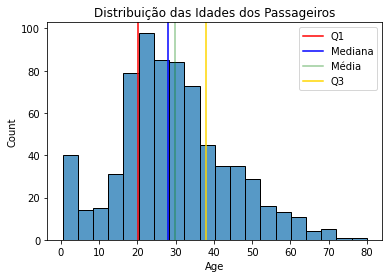

In [14]:
sns.histplot(df['Age'], bins=20)
plt.axvline(df['Age'].quantile(0.25), color='red', label='Q1')
plt.axvline(df['Age'].quantile(0.5), color='blue', label='Mediana')
plt.axvline(np.mean(df['Age']), color="green", label="Média", alpha=0.4)
plt.axvline(df['Age'].quantile(0.75), color='gold', label='Q3')

plt.legend()
plt.title('Distribuição das Idades dos Passageiros')
plt.show();

### Questão 5

Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`:
    
Ainda trabalhando com os valores das idades crie três _Boxplots_:
- _Boxplot_ das idades para todos os passageiros;
- _Boxplot_ das idades dos passageiros separados pelo sexo.
- _Boxplot_ das idades dos passageiros separados pelo sexo e por sobreviventes.

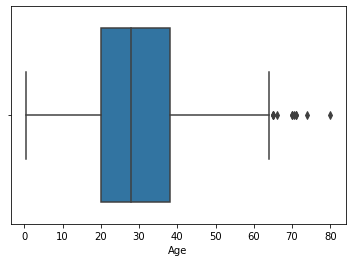

In [15]:
sns.boxplot(x=df['Age'], data=df);

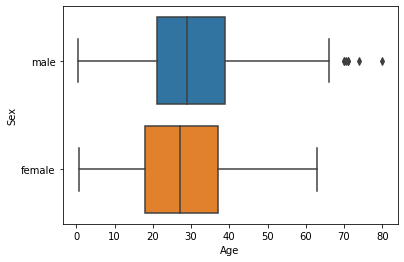

In [16]:
sns.boxplot(y='Sex', x= 'Age', data=df);

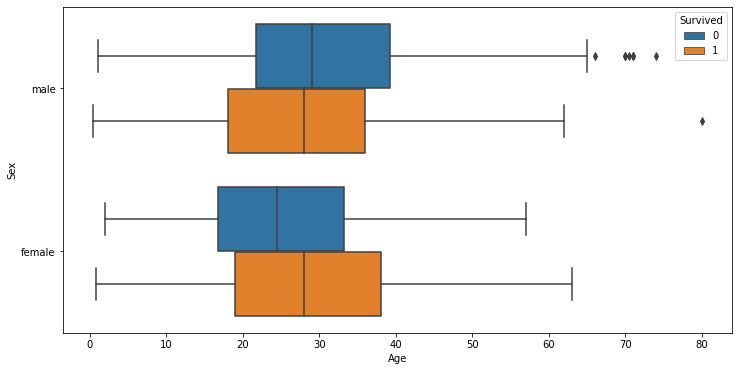

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(y='Sex', x= 'Age', data=df, hue = 'Survived');

Com o dataset `penguins`, responda as questões abaixo:

sns.load_dataset('penguins')

### Questão 6

Classifique o tipo de dado de cada coluna

### Questão 7
Calcule a frequência absoluta para cada espécie de pinguim

### Questão 8
Calcule a frequência relativa, relativa percentual e acumulativa de cada espécie de pinguim

### Questão 9
Utilizando a coluna `body_mass_g` do dataset Penguins, defina as principais métricas estatísticas para essa variável tais como:

- Média;
- Desvio Padrão;
- Mínimo;
- Primeiro Quartil;
- Segundo Quartil (Mediana);
- Terceiro Quartil;
- Distância Interquartil (IQR);
- Máximo;
- Skewness;
- Moda.

### Questão 10
Crie um gráfico da distribuição
da massa dos pinguins e identifique os pontos onde se encontram a média, mediana e moda das idades.

### Questão 11
Ainda trabalhando com os valores das massas dos pinguins crie três Boxplots:

- Boxplot das massas para todos os pinguins
- Boxplot das massas dos pinguins separados pelo sexo.
- Boxplot das massas dos pinguins separados pelo sexo e pela espécies.